############################################################################################
################## -- Programa de Especialización en Data Science Nivel I --##########################
############################################################################################

Modelos Clasificación : Regresión Logística, Regresión Logística Penalizada, Naive Bayes, K-NN.

Autores : José Cárdenas - André Chávez 

In [1]:
#######################################################################
##### Modelo de Regresión Logística y Logística Penalizada ############
#######################################################################

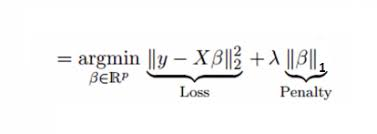

In [2]:
#Importar las librerías necesarias en Python.
import pandas as pd ## Manejo de dataframes o set de datos
%matplotlib inline
import matplotlib.pyplot as plt2 ## Todo lo referente a gráficas y demás.
import matplotlib as plt
import numpy as np ## Todo lo referente a trabajar con vectores y matrices
from scipy import stats ## Herramientas y algoritmos matemáticos para python
import seaborn as sns # Se basa en Matplotlib y la complementa en el tema de graficos y demás.

In [3]:
# Leer el dataset en un dataframe usando pandas
train = pd.read_csv("C:/Users/Administrador/train.csv") 

In [5]:
train.head(8)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N


In [9]:
train.iloc[:,3:10]

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0,Graduate,No,5849,0.0,NaN,360.0
1,1,Graduate,No,4583,1508.0,128.0,360.0
2,0,Graduate,Yes,3000,0.0,66.0,360.0
3,0,Not Graduate,No,2583,2358.0,120.0,360.0
4,0,Graduate,No,6000,0.0,141.0,360.0
5,2,Graduate,Yes,5417,4196.0,267.0,360.0
6,0,Not Graduate,No,2333,1516.0,95.0,360.0
7,3+,Graduate,No,3036,2504.0,158.0,360.0
8,2,Graduate,No,4006,1526.0,168.0,360.0
9,1,Graduate,No,12841,10968.0,349.0,360.0


In [10]:
train.iloc[:,[0,2,3,7,12]]

,Loan_ID,Married,Dependents,CoapplicantIncome,Loan_Status
0,LP001002,No,0,0.0,Y
1,LP001003,Yes,1,1508.0,N
2,LP001005,Yes,0,0.0,Y
3,LP001006,Yes,0,2358.0,Y
4,LP001008,No,0,0.0,Y
5,LP001011,Yes,2,4196.0,Y
6,LP001013,Yes,0,1516.0,Y
7,LP001014,Yes,3+,2504.0,N
8,LP001018,Yes,2,1526.0,Y
9,LP001020,Yes,1,10968.0,N


In [13]:
#Filtros
train.loc[train['Gender']=='Male',['Loan_Status', 'Gender']]

,Loan_Status,Gender
0,Y,Male
1,N,Male
2,Y,Male
3,Y,Male
4,Y,Male
5,Y,Male
6,Y,Male
7,N,Male
8,Y,Male
9,N,Male


In [16]:
#Filtros
train.loc[train['Gender'=='Male') & train[('Self_Employed'=='No'),['Loan_Status', 'Gender']]

SyntaxError: unexpected EOF while parsing (<ipython-input-16-589b27a6bc56>, line 2)

In [21]:
#Mostrar los registros 2 20 y 37 de las variables Loan_ID y Loan_Status
train.iloc[[1,19,36], [0,12]]

,Loan_ID,Loan_Status
1,LP001003,N
19,LP001041,Y
36,LP001109,N


In [19]:
#Mostrar el género y estado civil de las personas con Application income mayor igua a 1600 y coapplication menor igual a 3300
train.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [20]:
train.loc[(train["ApplicantIncome"] >= 1600) & (train["CoapplicantIncome"] <= 3300),["Gender", "Married"]]

,Gender,Married
0,Male,No
1,Male,Yes
2,Male,Yes
3,Male,Yes
4,Male,No
6,Male,Yes
7,Male,Yes
8,Male,Yes
10,Male,Yes
11,Male,Yes


In [30]:
#Mostrar los primeros 10 regustros consecutivos de las variables LOAN ID MARIED LOAN AMMOUN STATUS
train.head(1)
train.iloc[0:9,[0, 2, 8, 12]]

,Loan_ID,Married,LoanAmount,Loan_Status
0,LP001002,No,NaN,Y
1,LP001003,Yes,128.0,N
2,LP001005,Yes,66.0,Y
3,LP001006,Yes,120.0,Y
4,LP001008,No,141.0,Y
5,LP001011,Yes,267.0,Y
6,LP001013,Yes,95.0,Y
7,LP001014,Yes,158.0,N
8,LP001018,Yes,168.0,Y


In [32]:
#Mostrar los registros 3,10,37 con todas sus variables
train.head(1)
train.iloc[[2,9,36],:]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N


In [37]:
#Mostrar del dataset solo hombres con LOAN_AMOUNT mayor a 5000 soles
train.head(1)
train.loc[(train["Gender"]=="Male") & (train["LoanAmount"]>5000), :]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [38]:
#Mostrar del dataset las variables genero estado civil personas de genero femenino o solteras
train.loc[(train["Gender"]=="Female")|(train["Married"]=="No"),["Gender", "Married"]]


,Gender,Married
0,Male,No
4,Male,No
13,Male,No
15,Male,No
16,Male,No
17,Female,No
28,Male,No
29,Female,No
31,Male,No
32,Male,No


In [39]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train.apply(num_missing, axis=0)) # Axis = 0 es vertical , axis =1 horizontal.

Valores perdidos por columna
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [40]:
train['Dependents'] = train['Dependents'].replace({'0': 1,'1': 2, '2': 3, '3+': 4})
train['Gender'] = train['Gender'].replace({'Female': 1,'Male': 2})
train['Married'] = train['Married'].replace({'No': 1,'Yes': 2})
train['Self_Employed'] = train['Self_Employed'].replace({'No': 1,'Yes': 2})
train['Education'] = train['Education'].replace({'Graduate': 1,'Not Graduate': 2})
train['Credit_History'] = train['Credit_History'].replace({0: 1,1: 2})
train['Property_Area'] = train['Property_Area'].replace({'Rural': 1, 'Semiurban': 2, 'Urban': 3})
train['Loan_Status'] = train['Loan_Status'].replace({'N': 0,'Y': 1})

In [41]:
# Creamos un copia del dataset original para poder realizar las imputaciones
# Imputacion del Data train
train_parametrica=train.copy()
train_parametrica.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2.0,1.0,1.0,1,1.0,5849,0.0,NaN,360.0,2.0,3,1
1,LP001003,2.0,2.0,2.0,1,1.0,4583,1508.0,128.0,360.0,2.0,1,0
2,LP001005,2.0,2.0,1.0,1,2.0,3000,0.0,66.0,360.0,2.0,3,1
3,LP001006,2.0,2.0,1.0,2,1.0,2583,2358.0,120.0,360.0,2.0,3,1
4,LP001008,2.0,1.0,1.0,1,1.0,6000,0.0,141.0,360.0,2.0,3,1


In [42]:
# Imputación Paramétrica
# Para variables cuantitativas se puede usar medias o medianas, para las cualitativas moda.
# Imputamos por las moda todas las variables cualitativas
from scipy.stats import mode

for column in ['Gender', 'Married', 'Self_Employed', 'Credit_History','Dependents']:
    train_parametrica[column] = train_parametrica[column].fillna(train_parametrica[column].mode()[0])

# Imputamos por las moda todas las variables cuantitativas

for column in ['LoanAmount', 'Loan_Amount_Term']:
    train_parametrica[column] = train_parametrica[column].fillna(train_parametrica[column].median())   

In [43]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [46]:
# Le quitamos la variable Loan_ID o identificador único para poder modelar la información 
train_parametrica = train_parametrica.drop('Loan_ID', axis=1)

In [47]:
# Creación de la data de train y la data de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_parametrica.drop('Loan_Status', axis=1), train_parametrica['Loan_Status'], test_size=0.30,
                                                   random_state=100)
#Random state semilla aleatoria

In [48]:
#######################################################################
##### Modelo de Regresión Logística##################
#######################################################################

In [50]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
#result.summary2()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.464483
         Iterations 6


In [51]:
result.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.240     
Dependent Variable: Loan_Status      AIC:              420.5260  
Date:               2018-08-25 10:12 BIC:              465.2021  
No. Observations:   429              Log-Likelihood:   -199.26   
Df Model:           10               LL-Null:          -262.31   
Df Residuals:       418              LLR p-value:      2.9084e-22
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Gender            -0.7778   0.3579 -2.1734 0.0298 -1.4793 -0.0764
Married            0.4828   0.2993  1.6133 0.1067 -0.1037  1.0694
Dependents         0.0531   0.1392  0.3813 0.7030 -0.2198  0.3260
Education         -1.0141   0.2870 -3.5336 0.0004 -1.5766 -0.4516
Self_Employed     -0.4610   0.3314 -1.3910 0.1642 -1.1106  0.1886
ApplicantIncome   -0.0000   0.0000 -0.6494 0.5161 -0.0001  0.0000
CoapplicantIncome -0.0001   0.0001 -0.8813 0.3781 -0.0002  0.0001
LoanAmount        -0.0034   0.0018 -1.8434 0.0653 -0.0069  0.0002
Loan_Amount_Term  -0.0038   0.0018 -2.0870 0.0369 -0.0074 -0.0002
Credit_History     3.1574   0.3685  8.5689 0.0000  2.4352  3.8797
Property_Area     -0.2898   0.1556 -1.8626 0.0625 -0.5947  0.0152
=================================================================

"""

In [52]:
#Paso N.2: Predecir sobre la data de test con el modelo entrenado
y_pred=result.predict(X_test)
y_pred2=np.where(y_pred<0.5,0,1)

In [56]:
y_pred2=np.where(y_pred<0.5,0,1)

In [57]:
#Paso N.3: Evaluar indicadores
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred2))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred2))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred2))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred2))

	Accuracy: 0.773

	Precision: 0.763
	Recall: 0.951
	F1: 0.847



In [ ]:
#######################################################################
##### Modelo de Regresión Logística Penalizada Ridge ##################
#######################################################################

In [59]:
## Paso N° 01 : Entrenar un modelo
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

lr = LogisticRegression(penalty='l2') # Regresion Logistica Ridge
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
## Paso N° 02 : Predecir sobre la data de test con el modelo entrenado
y_pred=lr.predict(X_test)

In [61]:
## Paso N° 03 : Evaluar indicadores
print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.773

	Precision: 0.763
	Recall: 0.951
	F1: 0.847



In [62]:
## Paso N° 03 : Evaluar indicadores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

             precision    recall  f1-score   support

          0       0.82      0.43      0.56        63
          1       0.76      0.95      0.85       122

avg / total       0.78      0.77      0.75       185



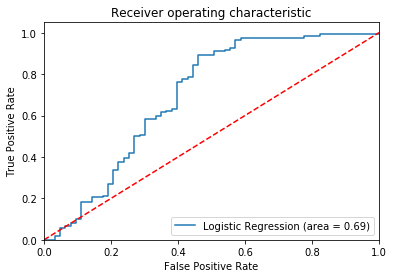

In [63]:
## Paso N° 03 : Evaluar indicadores

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)
from matplotlib import pyplot as plt

lr = LogisticRegression(penalty='l2')
lr.fit(X_train, y_train)

logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [30]:
## Paso N° 03 : Evaluar indicadores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.82      0.43      0.56        63
          1       0.76      0.95      0.85       122

avg / total       0.78      0.77      0.75       185



In [32]:
## Paso N° 03 : Evaluar indicadores
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7) #Definimos la validación cruzada
lr = LogisticRegression(penalty='l2') #Definimos el algoritmo a utilizar
scoring = 'accuracy' #Definimos la métrica de evaluación.
results = model_selection.cross_val_score(lr, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.812


In [65]:
## Paso N° 04: Puntuamos o scoreamos sobre información nueva o clientes sin VD.
# Como ya hemos entrenado un Modelo de Clasificación , podemos trabajar con el archivo de Test
test = pd.read_csv("C:/Users/Administrador/test.csv") # Leer el dataset en un dataframe usando pandas
test['Dependents'] = test['Dependents'].replace({'0': 1,'1': 2, '2': 3, '3+': 4})
test['Gender'] = test['Gender'].replace({'Female': 1,'Male': 2})
test['Married'] = test['Married'].replace({'No': 1,'Yes': 2})
test['Self_Employed'] = test['Self_Employed'].replace({'No': 1,'Yes': 2})
test['Education'] = test['Education'].replace({'Graduate': 1,'Not Graduate': 2})
test['Credit_History'] = test['Credit_History'].replace({0: 1,1: 2})
test['Property_Area'] = test['Property_Area'].replace({'Rural': 1, 'Semiurban': 2, 'Urban': 3})

In [66]:
# Imputacion del Data Test
test_parametrica=test.copy()

In [67]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())
#Aplicamos por columna:
print ("Valores perdidos por columna")
print (test_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [68]:
# Imputación Paramétrica
# Para variables cuantitativas se puede usar medias o medianas, para las cualitativas moda.
# Imputamos por las moda todas las variables cualitativas
from scipy.stats import mode

for column in ['Gender', 'Married', 'Self_Employed', 'Credit_History','Dependents']:
    test_parametrica[column] = test_parametrica[column].fillna(test_parametrica[column].mode()[0])
    
# Imputamos por las moda todas las variables cuantitativas
for column in ['LoanAmount', 'Loan_Amount_Term']:
    test_parametrica[column] = test_parametrica[column].fillna(test_parametrica[column].mean())  

In [69]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())
#Aplicamos por columna:
print ("Valores perdidos por columna")
print (test_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [70]:
# Eliminamos el ID para poder scorear o puntuar los registros
test_parametrica = test_parametrica.drop('Loan_ID', axis=1) 

In [71]:
y_final = lr.predict(test_parametrica) # Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD
data = np.hstack((test['Loan_ID'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
df_submmit.to_csv('Logistica001.csv', index=False)

In [43]:
## !! Listo , lo evaluamos en AnalyticsVidhya !!

In [ ]:
#######################################################################
##### Modelo de Regresión Logística Penalizada Lasso ##################
#######################################################################

In [18]:
lr2 = LogisticRegression(penalty='l1') # Regresion Logistica Lasso
lr2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
#######################################################################
##### Modelo de Clasificación Bayesiano : de Naive Bayes ##############
#######################################################################

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB(priors=None)

In [ ]:
#######################################################################
##### Modelo de Clasificación : K-NN ##################################
#######################################################################

In [48]:
from sklearn.neighbors import KNeighborsClassifier # Cuando utilizo p=1 Manhathan, p=2 Euclídea 
neigh = KNeighborsClassifier(n_neighbors=30,algorithm='kd_tree',p=2)
neigh.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')